<a href="https://colab.research.google.com/github/METIS-DATA-SCIENCE-PROJECTS/ML_Test/blob/main/Titanic_Deepchecks_ML_Test_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install deepchecks

     |████████████████████████████████| 216 kB 5.0 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 37.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [12]:
!pip show deepchecks

Name: deepchecks
Version: 0.5.0
Summary: UNKNOWN
Home-page: https://github.com/deepchecks/deepchecks
Author: deepchecks
Author-email: info@deepchecks.com
License: UNKNOWN
Location: /usr/local/lib/python3.7/dist-packages
Requires: ipywidgets, scikit-learn, matplotlib, pandas, scipy, ipython, category-encoders, tqdm, numpy, plotly, jsonpickle, statsmodels, typing-extensions, ipykernel
Required-by: 


In [13]:
from deepchecks.suites import full_suite

In [14]:
suites = full_suite()
suites

Full Suite: [
	0: ModelInfo
	1: ColumnsInfo
	2: ConfusionMatrixReport
	3: PerformanceReport
		Conditions:
			0: Train-Test scores relative degradation is not greater than 0.1
	4: RocReport(excluded_classes=[])
		Conditions:
			0: AUC score for all the classes is not less than 0.7
	5: SimpleModelComparison
		Conditions:
			0: Model performance gain over simple model is not less than 10%
	6: ModelErrorAnalysis
		Conditions:
			0: The performance difference of the detected segments must not be greater than 5%
	7: CalibrationScore
	8: TrustScoreComparison
		Conditions:
			0: Mean trust score decline is not greater than 20%
	9: RegressionSystematicError
		Conditions:
			0: Bias ratio is not greater than 0.01
	10: RegressionErrorDistribution
		Conditions:
			0: Kurtosis value is not less than -0.1
	11: BoostingOverfit
		Conditions:
			0: Test score over iterations doesn't decline by more than 5% from the best score
	12: UnusedFeatures
		Conditions:
			0: Number of high variance unused featur

In [15]:
import pandas as pd
source = 'https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/titanic.csv'

In [16]:
df = pd.read_csv(source)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
suites.run(df)

Full Suite:   0%|          | 0/36 [00:00<?, ? Check/s]

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

In [18]:
from deepchecks.suites import single_dataset_integrity
intg_suite = single_dataset_integrity()
suite_result = intg_suite.run(df)
suite_result

Single Dataset Integrity Suite:   0%|          | 0/8 [00:00<?, ? Check/s]

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

In [19]:
#suite_result.save_as_html('data_int_titanic.html')

In [20]:
!ls

sample_data


Training and Test Validation

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
label_col = ['Name', 'Sex', 'Ticket','Cabin', 'Embarked']

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size =.25)

print(df_train.shape)
print(df_test.shape)

(668, 12)
(223, 12)


In [24]:
from deepchecks import Dataset
ds_train = Dataset(df_train,label = 'Survived', cat_features =['Name', 'Sex', 'Ticket','Cabin', 'Embarked'] )
ds_test = Dataset(df_test,label = 'Survived', cat_features =['Name', 'Sex', 'Ticket','Cabin', 'Embarked'] )

In [25]:
suite2_result = suites.run(train_dataset=ds_train, test_dataset=ds_test)
suite2_result

Full Suite:   0%|          | 0/36 [00:00<?, ? Check/s]

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

In [26]:
#suite2_result.save_as_html('suite2_result')

Custom Data Validation

In [27]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset, CheckRunContext


class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""

    def run_logic(self, context: CheckRunContext) -> CheckResult:
        ## Check logic
        train_size = context.train.n_samples
        test_size = context.test.n_samples

        ## Return value as check result
        return_value = {'train_size': train_size, 'test_size': test_size}
        return CheckResult(return_value)

In [29]:
result = DatasetSizeComparison().run(ds_train, ds_test)
result

Dataset Size Comparison Check which compares the sizes of train and test datasets. Read More... Additional Outputs ✓ Nothing found

In [30]:
result.value

{'test_size': 223, 'train_size': 668}

In [31]:
import matplotlib.pyplot as plt

class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""

    def run_logic(self, context: CheckRunContext) -> CheckResult:
        ## Check logic
        train_size = context.train.n_samples
        test_size = context.test.n_samples

        ## Create the check result value
        sizes = {'Train': train_size, 'Test': test_size}
        sizes_df_for_display =  pd.DataFrame(sizes, index=['Size'])

        ## Display function of matplotlib graph:
        def graph_display():
            plt.bar(sizes.keys(), sizes.values(), color='green')
            plt.xlabel("Dataset")
            plt.ylabel("Size")
            plt.title("Datasets Size Comparison")

        return CheckResult(sizes, display=[sizes_df_for_display, graph_display])

,Train,Test
Size,668,223


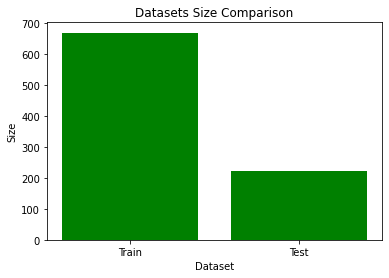

In [32]:
graph_result = DatasetSizeComparison().run(ds_train, ds_test)
graph_result